## MARKETING INSIGHTS

In [150]:
#Packages related to general operating system & warnings
import os
import glob
import warnings
warnings.filterwarnings('ignore')


#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd
import datetime as dt

#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

from pandas import Series, DataFrame
import datetime
import pandas_profiling
import scipy.stats as stats

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

<Figure size 432x216 with 0 Axes>

In [151]:
%pwd

'C:\\Users\\Akshay\\Desktop\\marketing-insights\\Datasets'

In [152]:
os.chdir('C:\\Users\\Akshay\\Desktop\\marketing-insights\\Datasets')

In [153]:
%pwd

'C:\\Users\\Akshay\\Desktop\\marketing-insights\\Datasets'

In [154]:
Cust = pd.read_excel('CustomersData.xlsx')
Cust.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [155]:
Dis_coupon = pd.read_csv('Discount_Coupon.csv')
Dis_coupon.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [156]:
Dis_coupon.columns

Index(['Month', 'Product_Category ', 'Coupon_Code', 'Discount_pct'], dtype='object')

In [157]:
Dis_coupon.columns = [x.replace(' ','') for x in Dis_coupon.columns] 

In [158]:
Dis_coupon.columns

Index(['Month', 'Product_Category', 'Coupon_Code', 'Discount_pct'], dtype='object')

In [159]:
Dis_coupon.dtypes

Month               object
Product_Category    object
Coupon_Code         object
Discount_pct         int64
dtype: object

In [160]:
Dis_coupon['Discount_pct'] = pd.to_numeric(Dis_coupon['Discount_pct'], downcast='float') 

In [161]:
Dis_coupon.dtypes

Month                object
Product_Category     object
Coupon_Code          object
Discount_pct        float32
dtype: object

In [162]:
Dis_coupon['Discount_pct'] = Dis_coupon['Discount_pct']/100

In [163]:
Dis_coupon.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,0.1
1,Feb,Apparel,SALE20,0.2
2,Mar,Apparel,SALE30,0.3
3,Jan,Nest-USA,ELEC10,0.1
4,Feb,Nest-USA,ELEC20,0.2


In [164]:
Market_spend = pd.read_csv('Marketing_Spend.csv')
Market_spend.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [165]:
Online_sales = pd.read_csv('Online_Sales.csv')
Online_sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,20190101,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,20190101,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,20190101,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [166]:
Online_sales['Transaction_Date'] = pd.to_datetime(Online_sales['Transaction_Date'], format='%Y%m%d')

In [167]:
Online_sales

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used
...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,2019-12-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked
52920,14410,48494,2019-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used
52921,14410,48495,2019-12-31,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used
52922,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked


In [168]:
Online_sales['Month'] = Online_sales['Transaction_Date'].apply(lambda x:pd.Timestamp.strftime(x, format='%b'))

In [169]:
Online_sales

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Jan
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Jan
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,Jan
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,Jan
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,Jan
...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,2019-12-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,Dec
52920,14410,48494,2019-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,Dec
52921,14410,48495,2019-12-31,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,Dec
52922,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,Dec


In [170]:
Tax_amt = pd.read_excel('Tax_amount.xlsx')
Tax_amt.head()

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


In [171]:
merge1 = pd.merge(Online_sales, Tax_amt, how="inner" , on='Product_Category' )
merge1.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,GST
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,0.1
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,0.1
2,13047,16684,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Clicked,Jan,0.1
3,13047,16684,2019-01-01,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,1,81.50,6.5,Used,Jan,0.1
4,13047,16688,2019-01-01,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,122.77,6.5,Used,Jan,0.1


In [172]:
merge2 = pd.merge(merge1, Dis_coupon, how='inner', left_on=['Product_Category','Month'], right_on=['Product_Category','Month'])
merge2.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,GST,Coupon_Code,Discount_pct
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,0.1,ELEC10,0.1
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,0.1,ELEC10,0.1
2,13047,16684,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Clicked,Jan,0.1,ELEC10,0.1
3,13047,16684,2019-01-01,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,1,81.50,6.5,Used,Jan,0.1,ELEC10,0.1
4,13047,16688,2019-01-01,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,122.77,6.5,Used,Jan,0.1,ELEC10,0.1


In [173]:
merg3 = pd.merge(Cust, merge2, how="inner", on="CustomerID")
merg3.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,GST,Coupon_Code,Discount_pct
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,0.1,ELEC10,0.1
1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,0.1,ELEC10,0.1
2,17850,M,Chicago,12,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Not Used,Jan,0.1,ELEC10,0.1
3,17850,M,Chicago,12,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,81.50,6.5,Clicked,Jan,0.1,ELEC10,0.1
4,17850,M,Chicago,12,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Clicked,Jan,0.1,ELEC10,0.1


In [174]:
Market_spend['Date'] = pd.to_datetime(Market_spend.Date)

In [175]:
#Market_spend['Month'] = Market_spend['Date'].apply(lambda x:pd.Timestamp.strftime(x,format="%b"))
#Market_spend

In [176]:
merge_df = pd.merge(merg3, Market_spend, "inner", left_on='Transaction_Date', right_on='Date')
merge_df.shape

(52524, 20)

In [177]:
merge_df.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,GST,Coupon_Code,Discount_pct,Date,Offline_Spend,Online_Spend
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5
1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5
2,17850,M,Chicago,12,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Not Used,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5
3,17850,M,Chicago,12,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,81.50,6.5,Clicked,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5
4,17850,M,Chicago,12,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Clicked,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5


In [178]:
merge_df['invoice_amt'] = ((merg3.Quantity*merg3.Avg_Price)*(1-merg3.Discount_pct)*(1+merg3.GST))+merg3.Delivery_Charges
merge_df.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,Delivery_Charges,Coupon_Status,Month,GST,Coupon_Code,Discount_pct,Date,Offline_Spend,Online_Spend,invoice_amt
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,6.5,Used,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,158.672896
1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,6.5,Used,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,158.672896
2,17850,M,Chicago,12,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,...,6.5,Not Used,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,249.584594
3,17850,M,Chicago,12,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,...,6.5,Clicked,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,87.184998
4,17850,M,Chicago,12,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,6.5,Clicked,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,158.672896


In [179]:
merg4 = merge_df.groupby(['CustomerID', "Month"]).invoice_amt.sum()

In [180]:
merg4.head()

CustomerID  Month
12346       Sep        86.328481
12347       Mar      1227.896264
            Nov      2872.973491
12348       Jun       300.494883
            Oct       297.213294
Name: invoice_amt, dtype: float64

In [181]:
df = pd.merge(merge_df, merg4, how="inner", left_on=['CustomerID','Month'], right_on=['CustomerID','Month'])

In [182]:
df.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,Coupon_Status,Month,GST,Coupon_Code,Discount_pct,Date,Offline_Spend,Online_Spend,invoice_amt_x,invoice_amt_y
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,Used,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,158.672896,38379.171634
1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,Used,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,158.672896,38379.171634
2,17850,M,Chicago,12,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,...,Not Used,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,249.584594,38379.171634
3,17850,M,Chicago,12,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,...,Clicked,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,87.184998,38379.171634
4,17850,M,Chicago,12,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,Clicked,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,158.672896,38379.171634


### Key Definitions
### `Key Process Indicators`

#### 1. Average order value = `Total Revenue / Transaction per customer`

In [183]:
trans_per_cust = df.Transaction_ID.count()
trans_per_cust

52524

In [184]:
# Let us consider, invoice_amt_x = invoice order value

total_revenue = df.invoice_amt_x.sum()
total_revenue

4677562.176470459

In [185]:
AVG_ORDER_VALUE = total_revenue / trans_per_cust
print("AVERAGE ORDER VALUE = ",AVG_ORDER_VALUE)

AVERAGE ORDER VALUE =  89.05571122668607


#### 2.Profit Margin
`Profit margin is the commonly used profitability ratio. It represents how much percentage of total sales has earned as the gain.`

In [186]:
total_expenses = Market_spend.Online_Spend.sum() + Market_spend.Offline_Spend.sum()
total_expenses

1733546.47

In [187]:
PROFIT_MARGIN = ((total_revenue - total_expenses) / total_revenue) *100
print("PROFIT MARGIN = ",PROFIT_MARGIN)

PROFIT MARGIN =  62.939103648471885


#### 3.Purchase Frequency
`is the average number of purchases made by a customer over a defined period of time (typically one month or one year). It is the sum of total number transactions divided by total number customers.`



In [188]:
total_cust = df['CustomerID'].nunique()
total_cust

1468

In [189]:
total_transactions = df['Transaction_ID'].count()
total_transactions

52524

In [190]:
PURCHASE_FREQUENCY = total_transactions / total_cust
print("PURCHASE_FREQUENCY = ",PURCHASE_FREQUENCY)

PURCHASE_FREQUENCY =  35.77929155313352


#### 4.Repeat rate `shows you the percentage of your current customer base that has come back to shop again.`

#### [ No. customers who've purchased before / Total no. customers] × 100 = Repeat Customer Rate (%)

In [191]:
cust_high_tenure = Cust.loc[Cust['Tenure_Months'] > 12].count()
print(cust_high_tenure)

CustomerID       1141
Gender           1141
Location         1141
Tenure_Months    1141
dtype: int64


In [233]:
REPEAT_RATE = (cust_high_tenure / total_cust) * 100
REPEAT_RATE

CustomerID       77.724796
Gender           77.724796
Location         77.724796
Tenure_Months    77.724796
dtype: float64

#### 4.Churn Rate `is the annual percentage rate at which customers stop subscribing.`

In [236]:
CHURN_RATE = 100 - REPEAT_RATE
CHURN_RATE

CustomerID       22.275204
Gender           22.275204
Location         22.275204
Tenure_Months    22.275204
dtype: float64

#### 5.Customer lifetime value
`lifetime customer value, or life-time value is a prediction of the net profit/revenue attributed to the entire future relationship with a customer.`

In [237]:
CUST_LIFETIME_VAL = AVG_ORDER_VALUE * PURCHASE_FREQUENCY
CUST_LIFETIME_VAL

3186.350256451267

In [238]:
insights = df.copy()

### Business Objectives:

#### 1) 1.	Calculate Invoice amount or sale_amount or revenue for each transaction and item level

In [239]:
insights.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,Coupon_Status,Month,GST,Coupon_Code,Discount_pct,Date,Offline_Spend,Online_Spend,invoice_amt_x,invoice_amt_y
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,Used,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,158.672896,38379.171634
1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,Used,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,158.672896,38379.171634
2,17850,M,Chicago,12,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,...,Not Used,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,249.584594,38379.171634
3,17850,M,Chicago,12,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,...,Clicked,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,87.184998,38379.171634
4,17850,M,Chicago,12,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,Clicked,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,158.672896,38379.171634


In [240]:
insights.drop(['invoice_amt_x', 'invoice_amt_y'], axis=1, inplace=True)

In [241]:
insights['invoice_value'] = ((insights.Quantity*insights.Avg_Price)*(1-insights.Discount_pct)*(1+insights.GST))+insights.Delivery_Charges
insights.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,Delivery_Charges,Coupon_Status,Month,GST,Coupon_Code,Discount_pct,Date,Offline_Spend,Online_Spend,invoice_value
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,6.5,Used,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,158.672896
1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,6.5,Used,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,158.672896
2,17850,M,Chicago,12,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,...,6.5,Not Used,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,249.584594
3,17850,M,Chicago,12,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,...,6.5,Clicked,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,87.184998
4,17850,M,Chicago,12,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,6.5,Clicked,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,158.672896


### 2) Detailed Exploratory Data Analysis

#### 2.1) Understanding how many customers acquired every month

In [261]:
insights.groupby(['Month'])[['CustomerID']].count()

,CustomerID
Month,
Apr,4098
Aug,6112
Dec,4502
Feb,3245
Jan,4023
Jul,5196
Jun,4159
Mar,4290
May,4516


#### 2.2) 	Understand the retention of customers on month on month basis.

In [254]:
insights.groupby(['Month','Tenure_Months']).agg(No_of_Cust_Retained = ('CustomerID','count'))

No_of_Cust_Retained
Month Tenure_Months                     
Apr   2                               32
      3                               16
      4                              123
      5                               95
      6                               28
...                                  ...
Sep   46                              43
      47                              28
      48                             101
      49                             108
      50                              13

[576 rows x 1 columns]

#### 2.3) How the revenues from existing/new customers on month on month basis

In [270]:
insights.groupby(['Month','CustomerID'])[['invoice_value']].sum()

invoice_value
Month CustomerID               
Apr   12429         2732.548671
      12433         5644.136537
      12471         6012.140161
      12481          893.079178
      12494          149.701047
...                         ...
Sep   18179         1121.709023
      18190           20.651500
      18212         2534.546834
      18223         2403.365923
      18233           82.614999

[2577 rows x 1 columns]

#### 2.4) How the discounts playing role in the revenues?

In [271]:
insights.groupby(['Month','CustomerID'])[['invoice_value', 'Discount_pct']].sum()

invoice_value  Discount_pct
Month CustomerID                             
Apr   12429         2732.548671           2.0
      12433         5644.136537           7.4
      12471         6012.140161           4.7
      12481          893.079178           1.0
      12494          149.701047           0.3
...                         ...           ...
Sep   18179         1121.709023           5.1
      18190           20.651500           0.3
      18212         2534.546834          12.6
      18223         2403.365923           9.6
      18233           82.614999           0.3

[2577 rows x 2 columns]

##### Observation:

`Descrease in the amount of Discount Percentage will lead to increase in Monthly Revenue Generation. However, increase in the amount of Discount Percentage will lead to decrease in Monthly Revenue Generation`

#### 2.5) Analyse KPI’s like Revenue, number of orders, average order value, number of customers (existing/new), quantity, by category, by month, by week, by day etc…

### A. Revenue

In [273]:
### Revenue by Category
insights.groupby(['Product_Category'])[['invoice_value']].sum()

,invoice_value
Product_Category,
Accessories,9.277126e+03
Android,9.860494e+02
Apparel,7.354504e+05
Bags,1.688531e+05
Bottles,9.309917e+03
Drinkware,2.402678e+05
Gift Cards,1.757481e+04
Headgear,5.345419e+04
Housewares,6.372834e+03


In [204]:
### Revenue by Month
insights.groupby(['Month'])[['invoice_value']].sum()

,invoice_value
Month,
Apr,441974.374406
Aug,415699.177131
Dec,439530.023310
Feb,324330.671311
Jan,460087.021809
Jul,419784.197762
Jun,287125.246451
Mar,330923.966805
May,313637.973426


In [205]:
### Revenue by Day
insights.groupby(['Transaction_Date'])[['invoice_value']].sum()

,invoice_value
Transaction_Date,
2019-01-01,8439.476885
2019-01-02,14054.818030
2019-01-03,27306.417962
2019-01-04,17906.883214
2019-01-05,19784.495719
...,...
2019-12-27,11212.753892
2019-12-28,9012.620078
2019-12-29,9818.467633


### B. Number of Orders

In [206]:
### Number of Orders by Category
insights.groupby(['Product_Category'])[['Transaction_ID']].count()

,Transaction_ID
Product_Category,
Accessories,234
Android,43
Apparel,18126
Bags,1882
Bottles,268
Drinkware,3483
Gift Cards,159
Headgear,771
Housewares,122


In [207]:
### Number of Orders by Month
insights.groupby(['Month'])[['Transaction_ID']].count()

,Transaction_ID
Month,
Apr,4098
Aug,6112
Dec,4502
Feb,3245
Jan,4023
Jul,5196
Jun,4159
Mar,4290
May,4516


In [208]:
### Number of Orders by Day
insights.groupby(['Transaction_Date'])[['Transaction_ID']].count()

,Transaction_ID
Transaction_Date,
2019-01-01,88
2019-01-02,111
2019-01-03,206
2019-01-04,166
2019-01-05,187
...,...
2019-12-27,103
2019-12-28,80
2019-12-29,89


### C. Quantity

In [209]:
# Quantiity by category
insights.groupby(['Product_Category'])[['Quantity']].sum()

,Quantity
Product_Category,
Accessories,1097
Android,45
Apparel,32438
Bags,15273
Bottles,2090
Drinkware,30501
Gift Cards,206
Headgear,3533
Housewares,2484


In [210]:
# Quantiity by Month
insights.groupby(['Month'])[['Quantity']].sum()

,Quantity
Month,
Apr,24922
Aug,27379
Dec,12667
Feb,16410
Jan,19987
Jul,22613
Jun,21482
Mar,20543
May,18519


In [211]:
# Quantiity by Day
insights.groupby(['Transaction_Date'])[['Quantity']].sum()

,Quantity
Transaction_Date,
2019-01-01,348
2019-01-02,251
2019-01-03,813
2019-01-04,594
2019-01-05,2388
...,...
2019-12-27,278
2019-12-28,114
2019-12-29,121


### D. Average Order Value

In [212]:
# Average Order Value by category
insights.groupby(['Product_Category']).agg(Avg_Order_Val=('invoice_value',np.mean))

,Avg_Order_Val
Product_Category,
Accessories,39.645837
Android,22.931381
Apparel,40.574337
Bags,89.720012
Bottles,34.738496
Drinkware,68.982989
Gift Cards,110.533379
Headgear,69.330990
Housewares,52.236341


In [213]:
# Average order value by Month
insights.groupby(['Month']).agg(Avg_Order_Val=('invoice_value',np.mean))

,Avg_Order_Val
Month,
Apr,107.851238
Aug,68.013609
Dec,97.629947
Feb,99.947819
Jan,114.364162
Jul,80.789876
Jun,69.037087
Mar,77.138454
May,69.450393


In [214]:
# Average order value by Day
insights.groupby(['Transaction_Date']).agg(Avg_Order_Val=('invoice_value',np.mean))

,Avg_Order_Val
Transaction_Date,
2019-01-01,95.903146
2019-01-02,126.619982
2019-01-03,132.555427
2019-01-04,107.872790
2019-01-05,105.799442
...,...
2019-12-27,108.861688
2019-12-28,112.657751
2019-12-29,110.319861


### E. Number of Customers

In [280]:
# Number of Customers by category

insights.groupby(['Product_Category','CustomerID']).agg({'CustomerID' : ['count']})

CustomerID
                                 count
Product_Category CustomerID           
Accessories      12347               1
                 12410               1
                 12468               2
                 12471               1
                 12472               1
...                                ...
Waze             18239               1
                 18245               5
                 18250               1
                 18260               1
                 18283               1

[8567 rows x 1 columns]

In [289]:
# Number of Customer by Month

insights.groupby(['Month','CustomerID']).agg({'CustomerID' : ['count']})

CustomerID
                      count
Month CustomerID           
Apr   12429              20
      12433              74
      12471              47
      12481              10
      12494               3
...                     ...
Sep   18179              17
      18190               1
      18212              42
      18223              32
      18233               1

[2577 rows x 1 columns]

In [291]:
#Number of Customer by Day

insights.groupby(['Transaction_Date','CustomerID']).agg({'CustomerID' : ['count']})

CustomerID
                                 count
Transaction_Date CustomerID           
2019-01-01       12583              20
                 13047              17
                 13748               1
                 14688               3
                 15100               1
...                                ...
2019-12-31       14410               8
                 14438               3
                 14600               2
                 14606              30
                 15781               5

[3207 rows x 1 columns]

#### 2.6) Understand the trends/seasonality of sales by category, location, month etc.…

In [301]:
# trends/seasonality of sales by category
pd.DataFrame(insights.groupby(['Product_Category'])['Transaction_ID'].count().sort_values(ascending=False))

,Transaction_ID
Product_Category,
Apparel,18126
Nest-USA,14013
Office,6513
Drinkware,3483
Lifestyle,3092
Nest,2198
Bags,1882
Headgear,771
Notebooks & Journals,749


##### Observation : `From the above result we can conclude that for particular Product_Category if the Transaction_ID count is Maximum indicates then there is Trend of that particular Product_Category.`

In [302]:
# trends/seasonality of sales by location.
pd.DataFrame(insights.groupby(['Location'])['Transaction_ID'].count().sort_values(ascending=False))

,Transaction_ID
Location,
Chicago,18240
California,16008
New York,11097
New Jersey,4470
Washington DC,2709


##### Observation : `From the above result we can conclude that for particular Location if the Transaction_ID count is Maximum indicates then there is Trend of that particular Location.`

In [303]:
# trends/seasonality of sales by month.

pd.DataFrame(insights.groupby(['Month'])['Transaction_ID'].count().sort_values(ascending=False))

,Transaction_ID
Month,
Aug,6112
Jul,5196
May,4516
Dec,4502
Mar,4290
Sep,4273
Jun,4159
Oct,4153
Apr,4098


##### Observation : `From the above result we can conclude that for particular Month if the Transaction_ID count is Maximum indicates then there is Trend of that particular Month.`

#### 2.7) How number order varies and sales with different days?

In [304]:
insights.groupby(['Transaction_Date'])[['invoice_value']].var()

,invoice_value
Transaction_Date,
2019-01-01,6696.133243
2019-01-02,13357.545154
2019-01-03,17453.893946
2019-01-04,10698.361383
2019-01-05,17110.645453
...,...
2019-12-27,7745.109541
2019-12-28,6503.090078
2019-12-29,6518.014120


#### 2.8) Calculate the Revenue, Marketing spends, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month.

In [311]:
# Calculate revenue by Month.

insights.groupby(['Month'])[['invoice_value']].sum()

,invoice_value
Month,
Apr,441974.374406
Aug,415699.177131
Dec,439530.023310
Feb,324330.671311
Jan,460087.021809
Jul,419784.197762
Jun,287125.246451
Mar,330923.966805
May,313637.973426


In [384]:
# Calculate Marketing spend by Month.

insights.groupby(['Month','Offline_Spend','Online_Spend']).agg({'Product_Category' : ['count']})

Product_Category
                                            count
Month Offline_Spend Online_Spend                 
Apr   2000          4019.93                    60
      2500          1136.06                   138
                    1748.14                   127
                    1909.27                    78
                    2200.69                    79
...                                           ...
Sep   3000          1736.19                   145
                    2424.97                   212
                    2441.62                    48
                    2546.67                   171
                    3713.10                   128

[365 rows x 1 columns]

In [388]:
# Calculate Percentage of Marketing spend out of Revenue.

insights.groupby(['Month','Offline_Spend','Online_Spend']).agg({'invoice_value' : ['sum']})

invoice_value
                                           sum
Month Offline_Spend Online_Spend              
Apr   2000          4019.93        5472.675890
      2500          1136.06       11640.218858
                    1748.14        9870.678060
                    1909.27        5472.642649
                    2200.69        6337.770358
...                                        ...
Sep   3000          1736.19       15568.839508
                    2424.97       15834.297241
                    2441.62        5660.012692
                    2546.67       13067.311276
                    3713.10        9751.143569

[365 rows x 1 columns]

In [225]:
# Calculate Tax by Month.

insights.groupby(['Month','GST'])[['invoice_value']].sum()

invoice_value
Month GST                
Apr   0.05   36676.629044
      0.10  237848.010912
      0.12     179.445998
      0.18  167270.288453
Aug   0.05   65396.396480
      0.10  216225.043395
      0.12    1069.426012
      0.18  133008.311244
Dec   0.05  115320.140892
      0.10  251197.404805
      0.18   73012.477612
Feb   0.05   11310.935323
      0.10  210949.692100
      0.12     163.061041
      0.18  101906.982846
Jan   0.05   11516.432426
      0.10  344962.816571
      0.12    1585.175815
      0.18  102022.596996
Jul   0.05   28866.713181
      0.10  256382.375337
      0.12    1492.504766
      0.18  133042.604477
Jun   0.05    7272.982051
      0.10  189419.104513
      0.12     410.555995
      0.18   90022.603892
Mar   0.05    8559.886248
      0.10  203666.867715
      0.12     853.143994
      0.18  117844.068848
May   0.05   11395.347342
      0.10  191981.011430
      0.12     584.064007
      0.18  109677.550647
Nov   0.05  152017.802194
      0.10  274219.219427
      0.18   49245.182343
Oct   0.05  117797.009722
      0.10  236259.742429
      0.18   94882.350720
Sep   0.05   63553.761084
      0.10  158013.242537
      0.12      35.456000
      0.18   98445.757603

In [363]:
# Calculate Percentage of Delivery Charges by Month.

(insights.groupby(['Month'])[['Delivery_Charges']].sum() / insights.invoice_value.sum()) * 100

,Delivery_Charges
Month,
Apr,0.875024
Aug,1.295440
Dec,0.809866
Feb,1.035887
Jan,1.248551
Jul,1.026691
Jun,0.792204
Mar,1.268274
May,0.871095


#### 2.10) Which product was appeared in the transactions?

In [389]:
present = 0
absent =0

for i in range(1,21):
    if Online_sales.Product_Category[i] != insights.Product_Category[i]:
        absent = absent + 1
        print("Present :",Online_sales.Product_Category[i])
    else:
        present = present + 1
        print("Not Present : ",Online_sales.Product_Category[i])
        
print("No. of product not present in transaction = ",present)
print("No. of product present in transaction = ",absent)

Not Present :  Nest-USA
Present : Office
Present : Apparel
Present : Bags
Present : Bags
Present : Drinkware
Present : Drinkware
Present : Drinkware
Present : Office
Present : Office
Present : Office
Present : Apparel
Not Present :  Nest-USA
Not Present :  Nest-USA
Present : Apparel
Present : Apparel
Present : Drinkware
Present : Lifestyle
Present : Office
Present : Office
No. of product not present in transaction =  3
No. of product present in transaction =  17


#### 2.11) Which product was purchased mostly based on the quantity?

In [324]:
pd.DataFrame(insights.groupby(['Product_Category','invoice_value'])['Quantity'].max().sort_values(ascending=False))

Quantity
Product_Category invoice_value          
Office           895.079977          900
                 587.177491          825
Headgear         8836.407732         791
Lifestyle        2794.249926         750
Office           608.049984          600
...                                  ...
Drinkware        57.150940             1
                 56.539379             1
                 54.789740             1
                 54.269379             1
Accessories      8.103200              1

[11612 rows x 1 columns]

### 3. Performing Customer Segmentation

#### 3.1) Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver, Standard customers and define strategy on the same.

In [82]:
segment = insights.copy()
segment.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,Delivery_Charges,Coupon_Status,Month,GST,Coupon_Code,Discount_pct,Date,Offline_Spend,Online_Spend,invoice_value
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,6.5,Used,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,158.672896
1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,6.5,Used,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,158.672896
2,17850,M,Chicago,12,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,...,6.5,Not Used,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,249.584594
3,17850,M,Chicago,12,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,...,6.5,Clicked,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,87.184998
4,17850,M,Chicago,12,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,6.5,Clicked,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,158.672896


In [83]:
segment.drop(['invoice_value'], axis=1, inplace=True)
segment.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,GST,Coupon_Code,Discount_pct,Date,Offline_Spend,Online_Spend
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5
1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5
2,17850,M,Chicago,12,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Not Used,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5
3,17850,M,Chicago,12,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,81.50,6.5,Clicked,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5
4,17850,M,Chicago,12,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Clicked,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5


In [84]:
segment['Overall_Spend'] = segment.Offline_Spend + segment.Online_Spend
segment.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,Delivery_Charges,Coupon_Status,Month,GST,Coupon_Code,Discount_pct,Date,Offline_Spend,Online_Spend,Overall_Spend
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,6.5,Used,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,6924.5
1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,6.5,Used,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,6924.5
2,17850,M,Chicago,12,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,...,6.5,Not Used,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,6924.5
3,17850,M,Chicago,12,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,...,6.5,Clicked,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,6924.5
4,17850,M,Chicago,12,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,6.5,Clicked,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,6924.5


#### Value-based Segmentation

In [85]:
segment.rename(columns={'Tenure_Months' : 'recency', 
                         'Overall_Spend' : 'frequency', 
                         'Avg_Price' : 'monetary'}, inplace=True)

In [86]:
segment.head()

,CustomerID,Gender,Location,recency,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,Delivery_Charges,Coupon_Status,Month,GST,Coupon_Code,Discount_pct,Date,Offline_Spend,Online_Spend,frequency
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,6.5,Used,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,6924.5
1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,6.5,Used,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,6924.5
2,17850,M,Chicago,12,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,...,6.5,Not Used,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,6924.5
3,17850,M,Chicago,12,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,...,6.5,Clicked,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,6924.5
4,17850,M,Chicago,12,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,6.5,Clicked,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,6924.5


In [87]:
segment.monetary.quantile([0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90])

0.1      2.58
0.2      4.12
0.3      8.79
0.4     13.43
0.5     16.99
0.6     26.00
0.7     79.00
0.8    119.00
0.9    149.00
Name: monetary, dtype: float64

In [88]:
segment['Deciles'] = pd.qcut(segment.monetary,10, labels=False)
segment.head()

,CustomerID,Gender,Location,recency,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,Coupon_Status,Month,GST,Coupon_Code,Discount_pct,Date,Offline_Spend,Online_Spend,frequency,Deciles
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,Used,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,6924.5,9
1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,Used,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,6924.5,9
2,17850,M,Chicago,12,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,...,Not Used,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,6924.5,8
3,17850,M,Chicago,12,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,...,Clicked,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,6924.5,7
4,17850,M,Chicago,12,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,Clicked,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,6924.5,9


In [89]:
segment.Deciles.value_counts()

7    7081
4    5914
6    5906
2    5445
1    5260
0    5257
8    5169
3    5052
5    4593
9    2847
Name: Deciles, dtype: int64

In [90]:
segment.groupby('Deciles').agg(np.mean)['monetary']

Deciles
0      1.824801
1      3.334177
2      6.089748
3     11.204828
4     15.213013
5     20.372735
6     55.700119
7    111.718112
8    141.999178
9    210.506821
Name: monetary, dtype: float64

In [91]:
segment.columns

Index(['CustomerID', 'Gender', 'Location', 'recency', 'Transaction_ID',
       'Transaction_Date', 'Product_SKU', 'Product_Description',
       'Product_Category', 'Quantity', 'monetary', 'Delivery_Charges',
       'Coupon_Status', 'Month', 'GST', 'Coupon_Code', 'Discount_pct', 'Date',
       'Offline_Spend', 'Online_Spend', 'frequency', 'Deciles'],
      dtype='object')

In [92]:
col_kpi=['monetary','recency','frequency', 'Gender', 'Location',
       'Transaction_Date', 'Product_Description',
       'Product_Category', 'Quantity', 'Delivery_Charges',
       'Coupon_Status', 'Month', 'GST', 'Coupon_Code', 'Discount_pct', 'Date',
       'Offline_Spend', 'Online_Spend', 'Deciles']

In [93]:
profiling_output= segment.groupby(['Deciles']).apply(lambda x: x[col_kpi].mean()).T
profiling_output

Deciles,0,1,2,3,4,5,6,7,8,9
monetary,1.824801,3.334177,6.089748,11.204828,15.213013,20.372735,55.700119,111.718112,141.999178,210.506821
recency,26.518166,25.846388,26.147291,25.838282,26.347311,26.269976,25.939384,26.207315,25.997678,26.379698
frequency,4678.797889,4665.402432,4570.598736,4525.066587,4545.748957,4906.771367,4637.897130,4770.197053,4863.327251,5497.096849
Quantity,14.251474,9.523384,6.394858,3.873713,2.489347,2.412149,1.735354,1.487219,1.336816,1.219881
Delivery_Charges,13.677381,13.326998,12.431348,11.863860,11.057746,11.235487,9.138156,7.241572,7.084941,7.654816
GST,0.123589,0.152605,0.154560,0.160150,0.172798,0.166597,0.150328,0.099044,0.100333,0.077478
Discount_pct,0.197733,0.196137,0.193018,0.193247,0.198896,0.213081,0.199436,0.203003,0.197191,0.207938
Offline_Spend,2810.652463,2771.216730,2722.956841,2693.329375,2721.846466,2963.814500,2772.384016,2857.548369,2928.632231,3347.102213
Online_Spend,1868.145425,1894.185702,1847.641895,1831.737213,1823.902491,1942.956867,1865.513114,1912.648684,1934.695020,2149.994636
Deciles,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000


#### RFM Segmentation

In [94]:
quantiles = segment[['frequency','monetary','recency' ]].quantile(q=[0.33,0.67])
quantiles

,frequency,monetary,recency
0.33,4188.98,10.39,19.0
0.67,5219.46,65.09,34.0


In [95]:
segment['R_seg'] = np.where(segment.recency<=19, 'Active', np.where(segment.recency>34, 'At Risk', 'Churn'))
segment['F_seg'] = np.where(segment.frequency<=4188.98, 1, np.where(segment.frequency<=5219.46, 2, 3))
segment['M_seg'] = np.where(segment.monetary<=10.39, 1, np.where(segment.monetary<=65.09, 2, 3))

In [96]:
segment.head()

,CustomerID,Gender,Location,recency,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,Coupon_Code,Discount_pct,Date,Offline_Spend,Online_Spend,frequency,Deciles,R_seg,F_seg,M_seg
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,ELEC10,0.1,2019-01-01,4500,2424.5,6924.5,9,Active,3,3
1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,ELEC10,0.1,2019-01-01,4500,2424.5,6924.5,9,Active,3,3
2,17850,M,Chicago,12,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,...,ELEC10,0.1,2019-01-01,4500,2424.5,6924.5,8,Active,3,3
3,17850,M,Chicago,12,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,...,ELEC10,0.1,2019-01-01,4500,2424.5,6924.5,7,Active,3,3
4,17850,M,Chicago,12,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,ELEC10,0.1,2019-01-01,4500,2424.5,6924.5,9,Active,3,3


In [97]:
segment['FM_seg'] = np.where(((segment.F_seg == 3) & (segment.M_seg ==3)) , 'Premium',
                          np.where((((segment.F_seg == 3) & (segment.M_seg == 2)) | ((segment.F_seg == 2) & (segment.M_seg ==3))) , 'Gold',
                          np.where((((segment.F_seg == 1) & (segment.M_seg ==3)) | ((segment.F_seg == 3) & (segment.M_seg == 1)) | ((segment.F_seg == 2) & (segment.M_seg ==2))), 'Silver', 'Standard' )))
segment.head(10)

,CustomerID,Gender,Location,recency,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,Discount_pct,Date,Offline_Spend,Online_Spend,frequency,Deciles,R_seg,F_seg,M_seg,FM_seg
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,0.1,2019-01-01,4500,2424.5,6924.5,9,Active,3,3,Premium
1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,0.1,2019-01-01,4500,2424.5,6924.5,9,Active,3,3,Premium
2,17850,M,Chicago,12,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,...,0.1,2019-01-01,4500,2424.5,6924.5,8,Active,3,3,Premium
3,17850,M,Chicago,12,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,...,0.1,2019-01-01,4500,2424.5,6924.5,7,Active,3,3,Premium
4,17850,M,Chicago,12,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,0.1,2019-01-01,4500,2424.5,6924.5,9,Active,3,3,Premium
5,17850,M,Chicago,12,16701,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,0.1,2019-01-01,4500,2424.5,6924.5,9,Active,3,3,Premium
6,17850,M,Chicago,12,16702,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,2,...,0.1,2019-01-01,4500,2424.5,6924.5,9,Active,3,3,Premium
7,17850,M,Chicago,12,16703,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,2,...,0.1,2019-01-01,4500,2424.5,6924.5,7,Active,3,3,Premium
8,17850,M,Chicago,12,16704,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,0.1,2019-01-01,4500,2424.5,6924.5,9,Active,3,3,Premium
9,17850,M,Chicago,12,16710,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,0.1,2019-01-01,4500,2424.5,6924.5,9,Active,3,3,Premium


#### 3.2) Scientific (Using K-Means) & understand the profiles. Define strategy for each segment.

In [98]:
segment.columns

Index(['CustomerID', 'Gender', 'Location', 'recency', 'Transaction_ID',
       'Transaction_Date', 'Product_SKU', 'Product_Description',
       'Product_Category', 'Quantity', 'monetary', 'Delivery_Charges',
       'Coupon_Status', 'Month', 'GST', 'Coupon_Code', 'Discount_pct', 'Date',
       'Offline_Spend', 'Online_Spend', 'frequency', 'Deciles', 'R_seg',
       'F_seg', 'M_seg', 'FM_seg'],
      dtype='object')

In [99]:
selected_vars = ['recency', 'Quantity', 'monetary', 'Delivery_Charges', 'GST', 'Discount_pct', 'frequency']

In [100]:
final_input_segmentation = segment[selected_vars]

In [101]:
final_input_segmentation

,recency,Quantity,monetary,Delivery_Charges,GST,Discount_pct,frequency
0,12,1,153.71,6.50,0.10,0.1,6924.50
1,12,1,153.71,6.50,0.10,0.1,6924.50
2,12,2,122.77,6.50,0.10,0.1,6924.50
3,12,1,81.50,6.50,0.10,0.1,6924.50
4,12,1,153.71,6.50,0.10,0.1,6924.50
...,...,...,...,...,...,...,...
52519,15,20,3.99,34.16,0.10,0.1,5230.76
52520,15,1,349.00,6.00,0.05,0.1,5230.76
52521,15,1,99.00,6.00,0.05,0.1,5230.76
52522,15,1,99.00,6.00,0.05,0.1,5230.76


##### Scientific approach

In [102]:
km_3 = KMeans(n_clusters=3, random_state=123)
km_3 = km_3.fit(final_input_segmentation)

In [103]:
km_3.cluster_centers_

array([[2.67803719e+01, 4.13202479e+00, 6.75669752e+01, 1.01931653e+01,
        1.28307851e-01, 2.07882238e-01, 6.84537266e+03],
       [2.52515057e+01, 4.46194035e+00, 4.68536978e+01, 1.13188745e+01,
        1.40505769e-01, 1.93853862e-01, 2.98520150e+03],
       [2.63487252e+01, 4.64091801e+00, 5.00308413e+01, 1.01721983e+01,
        1.39015931e-01, 1.99442595e-01, 4.84671417e+03]])

In [104]:
km_3.labels_

array([0, 0, 0, ..., 2, 2, 2])

In [105]:
km_4 = KMeans(n_clusters=4, random_state=123).fit(final_input_segmentation)
km_5 = KMeans(n_clusters=5, random_state=123).fit(final_input_segmentation)
km_6 = KMeans(n_clusters=6, random_state=123).fit(final_input_segmentation)
km_7 = KMeans(n_clusters=7, random_state=123).fit(final_input_segmentation)
km_8 = KMeans(n_clusters=8, random_state=123).fit(final_input_segmentation)

In [106]:
segment['cluster_3'] = km_3.labels_
segment['cluster_4'] = km_4.labels_
segment['cluster_5'] = km_5.labels_
segment['cluster_6'] = km_6.labels_
segment['cluster_7'] = km_7.labels_
segment['cluster_8'] = km_8.labels_

In [107]:
segment.head()

,CustomerID,Gender,Location,recency,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,R_seg,F_seg,M_seg,FM_seg,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,Active,3,3,Premium,0,0,1,3,0,0
1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,Active,3,3,Premium,0,0,1,3,0,0
2,17850,M,Chicago,12,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,...,Active,3,3,Premium,0,0,1,3,0,0
3,17850,M,Chicago,12,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,...,Active,3,3,Premium,0,0,1,3,0,0
4,17850,M,Chicago,12,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,Active,3,3,Premium,0,0,1,3,0,0


In [108]:
silhouette_score(final_input_segmentation, km_8.labels_)

0.5108798390453014

In [109]:
# calculate SC for K=3 through K=8
k_range = range(3, 8)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(final_input_segmentation)
    scores.append(silhouette_score(final_input_segmentation, km.labels_))

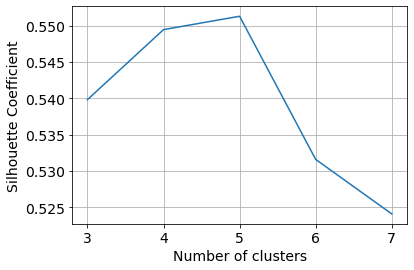

In [110]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [111]:
scores

[0.5398020586832974,
 0.5494431209430072,
 0.5512854232782676,
 0.531582106470635,
 0.5240817789824859]

In [112]:
segment.cluster_4.value_counts()/sum(segment.cluster_3.value_counts())

2    0.394315
3    0.358960
0    0.136242
1    0.110483
Name: cluster_4, dtype: float64

In [113]:
#Profiling
size = pd.concat([pd.Series(segment.cluster_3.size), pd.Series.sort_index(segment.cluster_3.value_counts()), pd.Series.sort_index(segment.cluster_4.value_counts()),
           pd.Series.sort_index(segment.cluster_5.value_counts()), pd.Series.sort_index(segment.cluster_6.value_counts()),
           pd.Series.sort_index(segment.cluster_7.value_counts()), pd.Series.sort_index(segment.cluster_8.value_counts())])

In [114]:
size

0    52524
0     9625
1    13781
2    29118
0     7156
1     5803
2    20711
3    18854
0    17807
1     6892
2     4621
3    13363
4     9841
0     6328
1    14003
2     9213
3     5219
4     4568
5    13193
0     4288
1    12733
2     4568
3     8298
4    10556
5     9213
6     2868
0     4175
1     9922
2    12065
3     3768
4     2868
5     3753
6    10225
7     5748
dtype: int64

In [115]:
Seg_size = pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/segment.cluster_3.size, columns=['Seg_Pct'])

In [116]:
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_Pct,1.0,0.18325,0.262375,0.554375,0.136242,0.110483,0.394315,0.35896,0.339026,0.131216,...,0.175406,0.054604,0.079487,0.188904,0.229705,0.071739,0.054604,0.071453,0.194673,0.109436


In [117]:
pd.concat([Seg_size.T, Seg_Pct.T], axis=0)

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,52524.0,9625.00000,13781.000000,29118.000000,7156.000000,5803.000000,20711.000000,18854.00000,17807.000000,6892.000000,...,9213.000000,2868.000000,4175.000000,9922.000000,12065.000000,3768.000000,2868.000000,3753.000000,10225.000000,5748.000000
Seg_Pct,1.0,0.18325,0.262375,0.554375,0.136242,0.110483,0.394315,0.35896,0.339026,0.131216,...,0.175406,0.054604,0.079487,0.188904,0.229705,0.071739,0.054604,0.071453,0.194673,0.109436


### 5.Cross-Selling (Which products are selling together)

#### 5.1) You can perform exploratory analysis & market basket analysis to understand which of items can be bundled together.

In [120]:
mba = insights.copy()

In [121]:
mba.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,Delivery_Charges,Coupon_Status,Month,GST,Coupon_Code,Discount_pct,Date,Offline_Spend,Online_Spend,invoice_value
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,6.5,Used,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,158.672896
1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,6.5,Used,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,158.672896
2,17850,M,Chicago,12,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,...,6.5,Not Used,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,249.584594
3,17850,M,Chicago,12,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,...,6.5,Clicked,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,87.184998
4,17850,M,Chicago,12,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,6.5,Clicked,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,158.672896


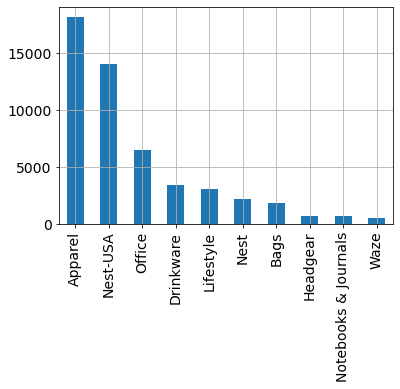

In [122]:
mba["Product_Category"].value_counts()[:10].plot(kind="bar")
plt.show()

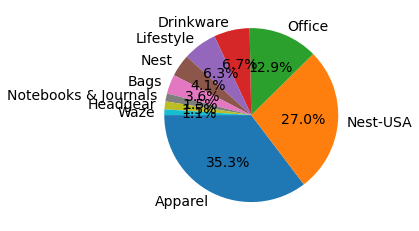

In [123]:
values = mba.Product_Category.loc[(mba['Coupon_Status']== "Used")].value_counts()[:10]
labels = mba.Product_Category.loc[(mba['Coupon_Status']== "Used")].value_counts().index[:10]

plt.pie(values, autopct='%1.1f%%', labels = labels,
        startangle=180)

plt.show()

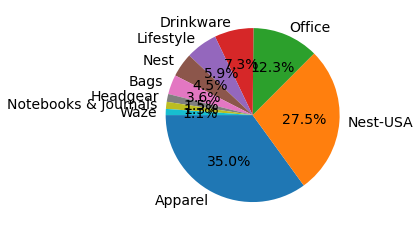

In [124]:
values = mba.Product_Category.loc[(mba['Coupon_Status']== "Not Used")].value_counts()[:10]
labels = mba.Product_Category.loc[(mba['Coupon_Status']== "Not Used")].value_counts().index[:10]

plt.pie(values, autopct='%1.1f%%', labels = labels,
        startangle=180)

plt.show()

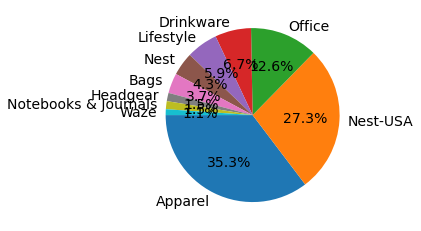

In [125]:
values = mba.Product_Category.loc[(mba['Coupon_Status']== "Clicked")].value_counts()[:10]
labels = mba.Product_Category.loc[(mba['Coupon_Status']== "Clicked")].value_counts().index[:10]

plt.pie(values, autopct='%1.1f%%', labels = labels,
        startangle=180)

plt.show()

In [126]:
most_used = mba.Product_Category.loc[(mba['Coupon_Status']== "Used")].value_counts()[:10] / sum(mba.Product_Category.loc[(mba['Coupon_Status'] == "Used")].value_counts()) *100 
most_not_used = mba.Product_Category.loc[(mba['Coupon_Status']== "Not Used")].value_counts()[:10] / sum(mba.Product_Category.loc[(mba['Coupon_Status'] == "Not Used")].value_counts()) *100
most_clicked = mba.Product_Category.loc[(mba['Coupon_Status']== "Clicked")].value_counts()[:10] / sum(mba.Product_Category.loc[(mba['Coupon_Status'] == "Clicked")].value_counts()) *100
top_overall = mba.Product_Category.value_counts()[:10] / sum(mba.Product_Category.value_counts()) *100 
topseller = pd.DataFrame([most_used, most_not_used, most_clicked, top_overall], index = ["Used", "Not Used", "Clicked", "Overall"]).transpose()
topseller

,Used,Not Used,Clicked,Overall
Apparel,34.627067,34.226265,34.517216,34.509938
Nest-USA,26.504669,26.912534,26.725299,26.679232
Office,12.656092,12.060802,12.331587,12.400046
Drinkware,6.530543,7.101919,6.556886,6.631254
Lifestyle,6.193048,5.756292,5.722305,5.886833
Nest,4.049949,4.373287,4.217814,4.184754
Bags,3.515581,3.550959,3.637725,3.583124
Notebooks & Journals,1.445607,1.283329,1.455838,1.426015
Headgear,1.439982,1.420384,1.500749,1.467900
Waze,1.034987,1.108896,1.051647,1.054756


In [127]:
worst_used = mba.Product_Category.loc[(mba['Coupon_Status']== "Used")].value_counts()[-10:] / sum(mba.Product_Category.loc[(mba['Coupon_Status'] == "Used")].value_counts()) *100 
worst_not_used = mba.Product_Category.loc[(mba['Coupon_Status']== "Not Used")].value_counts()[-10:] / sum(mba.Product_Category.loc[(mba['Coupon_Status'] == "Not Used")].value_counts()) *100
worst_clicked = mba.Product_Category.loc[(mba['Coupon_Status']== "Clicked")].value_counts()[-10:] / sum(mba.Product_Category.loc[(mba['Coupon_Status'] == "Clicked")].value_counts()) *100
worst_overall = mba.Product_Category.value_counts()[-10:] / sum(mba.Product_Category.value_counts()) *100 
worstseller = pd.DataFrame([worst_used, worst_not_used, worst_clicked, worst_overall], index = ["Used", "Not Used", "Clicked", "Overall"]).transpose()
worstseller

,Used,Not Used,Clicked,Overall
Bags,3.515581,3.550959,3.637725,3.583124
Notebooks & Journals,1.445607,1.283329,1.455838,1.426015
Headgear,1.439982,1.420384,1.500749,1.467900
Waze,1.034987,1.108896,1.051647,1.054756
Nest-Canada,0.534368,0.585597,0.654940,0.603534
Bottles,0.461244,0.598056,0.516467,0.510243
Accessories,0.433120,0.398704,0.467814,0.445511
Gift Cards,0.314996,0.274109,0.303144,0.302719
Housewares,0.202497,0.224271,0.254491,0.232275
Android,0.056249,0.124595,0.086078,0.081867


### Market Basket Analysis

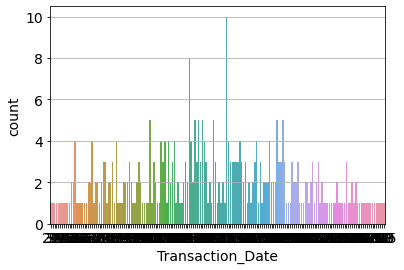

In [128]:
sns.countplot(mba["Transaction_Date"].value_counts())
plt.show()

In [129]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [130]:
top_overall = mba
most_used = mba[mba["Coupon_Status"]=="Used"]
most_not_used = mba[mba["Coupon_Status"]=="Not Used"]
most_clicked = mba[mba["Coupon_Status"]=="Clicked"]

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

def apri(data):
    encoding = data.groupby(['Transaction_Date','Product_Category'])['Product_Category'].count().unstack().reset_index().fillna(0).set_index('Transaction_Date').astype(int)
    encoding = encoding.applymap(encode_units)
    frequent_itemsets = apriori(encoding, min_support=0.03, use_colnames=True)
    rules_1 = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
    output = rules_1.sort_values(by=['confidence'], ascending=False)
    return output

print("Model ready")

Model ready


In [131]:
apri(top_overall).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1517391,"(Gift Cards, Nest-USA, Drinkware, Headgear, Of...","(Apparel, Bags)",0.068493,0.942466,0.068493,1.0,1.061047,0.003941,inf
1571437,"(Apparel, Lifestyle, Gift Cards, Housewares, H...","(Bags, Notebooks & Journals)",0.032877,0.575342,0.032877,1.0,1.738095,0.013961,inf
168787,"(Bags, Android, Nest-Canada, Notebooks & Journ...","(Office, Drinkware)",0.063014,0.972603,0.063014,1.0,1.028169,0.001726,inf
168788,"(Android, Office, Nest-Canada, Notebooks & Jou...","(Bags, Drinkware)",0.063014,0.936986,0.063014,1.0,1.067251,0.003971,inf
452796,"(Bottles, Android, Nest-Canada, Drinkware)","(Bags, Office, Notebooks & Journals)",0.046575,0.575342,0.046575,1.0,1.738095,0.019779,inf
1571440,"(Apparel, Notebooks & Journals, Gift Cards, Ho...","(Nest-USA, Lifestyle)",0.032877,0.945205,0.032877,1.0,1.057971,0.001801,inf
2112738,"(Apparel, Housewares, Nest-Canada, Drinkware, ...","(Bags, Lifestyle, Notebooks & Journals)",0.060274,0.567123,0.060274,1.0,1.763285,0.026091,inf
2112739,"(Apparel, Housewares, Nest-Canada, Bags, Headg...","(Drinkware, Lifestyle, Notebooks & Journals)",0.060274,0.569863,0.060274,1.0,1.754808,0.025926,inf
168796,"(Bags, Android, Nest-Canada, Drinkware)","(Office, Notebooks & Journals)",0.063014,0.580822,0.063014,1.0,1.721698,0.026414,inf
168798,"(Bags, Android, Office, Nest-Canada)","(Drinkware, Notebooks & Journals)",0.063014,0.580822,0.063014,1.0,1.721698,0.026414,inf


### 7. Perform cohort analysis by defining below cohorts

In [139]:
cohort = insights.copy()

In [140]:
cohort.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,Delivery_Charges,Coupon_Status,Month,GST,Coupon_Code,Discount_pct,Date,Offline_Spend,Online_Spend,invoice_value
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,6.5,Used,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,158.672896
1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,6.5,Used,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,158.672896
2,17850,M,Chicago,12,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,...,6.5,Not Used,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,249.584594
3,17850,M,Chicago,12,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,...,6.5,Clicked,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,87.184998
4,17850,M,Chicago,12,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,6.5,Clicked,Jan,0.1,ELEC10,0.1,2019-01-01,4500,2424.5,158.672896


#### 7.1) Customers who started in each month and understand their behaviour

In [159]:
customer = cohort.groupby("CustomerID").agg({'Transaction_Date' : lambda x: x.min().month,
                                                'Transaction_ID' : lambda x: len(x),
                                                'invoice_value' :  lambda x: sum(x)})

customer.columns = ['Start_Month', 'Frequency', 'Total_Sales']
customer.head(10)

,Start_Month,Frequency,Total_Sales
CustomerID,,,
12346,9,2,174.981740
12347,3,59,12059.177679
12348,6,23,1501.926171
12350,12,17,1183.713922
12356,9,36,1753.450841
12359,8,16,653.190488
12370,5,90,6722.007394
12373,12,14,471.838434
12377,7,76,9732.132872


#### 7.2) Which Month cohort has maximum retention?

In [142]:
def get_month(x):
    return dt.datetime(x.year,x.month,1)
cohort['InvoiceMonth'] = cohort['Transaction_Date'].apply(get_month)
grouping = cohort.groupby('CustomerID')['InvoiceMonth']
cohort['CohortMonth'] = grouping.transform('min')

In [143]:
def get_month_int (cohort, column):
    year = cohort[column].dt.year
    month = cohort[column].dt.month
    day = cohort[column].dt.day
    return year, month , day 

In [144]:
invoice_year, invoice_month, _ = get_month_int(cohort,'InvoiceMonth')
cohort_year, cohort_month, _ = get_month_int(cohort,'CohortMonth')

In [145]:
year_diff = invoice_year - cohort_year 
month_diff = invoice_month - cohort_month 

In [146]:
cohort['CohortIndex'] = year_diff * 12 + month_diff + 1 

In [147]:
#Count monthly active customers from each cohort
grouping = cohort.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
#Return number of unique elements in the object.
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')

In [148]:
# Retention table

cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis 
retention.round(3) * 100 #to show the number as percentage

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2019-01-01,100.0,6.0,11.2,15.8,10.7,20.5,16.3,21.9,10.7,13.0,9.3,15.8
2019-02-01,100.0,7.3,9.4,16.7,17.7,22.9,19.8,15.6,12.5,11.5,16.7,NaN
2019-03-01,100.0,10.2,19.8,14.1,18.1,18.6,12.4,12.4,8.5,10.7,NaN,NaN
2019-04-01,100.0,8.6,14.7,14.7,11.0,9.2,6.1,9.8,7.4,NaN,NaN,NaN
2019-05-01,100.0,10.7,8.0,11.6,8.9,11.6,12.5,7.1,NaN,NaN,NaN,NaN
2019-06-01,100.0,14.6,16.1,8.8,8.0,10.2,8.0,NaN,NaN,NaN,NaN,NaN
2019-07-01,100.0,12.9,4.3,5.4,10.8,8.6,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,100.0,10.3,11.8,8.1,6.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,100.0,7.7,3.8,2.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


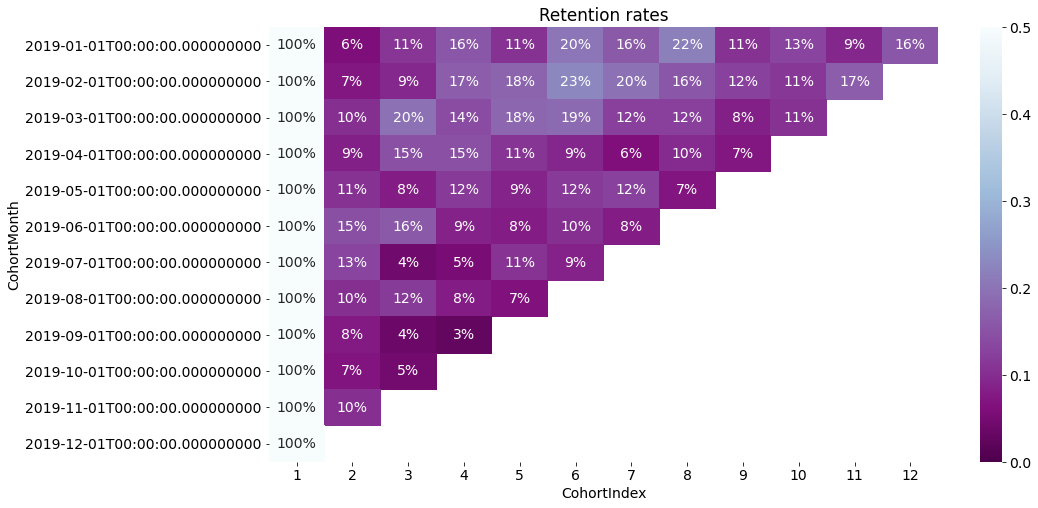

In [149]:
#Build the heatmap

plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap="BuPu_r")
plt.show()

## -----------------------------------------------------------------------------------------------------------------------------